### Part A

In [226]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B`

# Approach
1. Problem definition:-Using the CSV data Predict the class values(Regression Problem).

2. Data:- The Sample data having 37 columns, including two categorical values and one target values

3. Data Preprocessing:- Convert the categorical values to numerical values using OnehotEncoding method

4. Modeling and comparison:- Select the compare the best available Regrression models. 

5. Hyperparameter tuning using RandomizedSearchCV on 2 commom models

6. Evaluation:- We will apply differnt evaluation metrix available for Regrression model

7. Predict the Target values from test data using the best model

### Preparing the tools

Import all the packages required for the process

In [227]:

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
import warnings


In [228]:
warnings.filterwarnings('ignore')

### Load Data and Verify the columns

In [229]:
# Import training and validation sets
df = pd.read_csv("P2_Data.csv",
                 low_memory=False)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [231]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96


In [232]:
df.isna().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

In [233]:
len(df)

1500

## Getting our data ready to be used with machine learning

Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values(categorical) to numerical values (also called feature encoding)

In [234]:
# Split into X/y
X = df.drop("Target", axis=1)
y = df["Target"]

In [235]:
X,y

(           F1        F2      F3        F4      F5     F6       F7     F8  \
 0      854.04 -15267.84  193.04  12132.20  464.22 -19.81   920.42  11.84   
 1     1748.76  -4299.45  439.72  18046.14  540.36  -8.55  1913.78  11.28   
 2      834.44 -18927.93  -85.86  18533.56  611.34 -15.88  1956.90  10.00   
 3     1429.36   3653.73  -59.69  31314.52  408.45  -9.67  1628.18  11.59   
 4      188.80  -3932.07  128.70  22837.34  530.22 -14.93  1218.16   9.55   
 ...       ...       ...     ...       ...     ...    ...      ...    ...   
 1495   987.12   4369.68 -223.67  25595.70  395.58 -14.05  2503.50  13.57   
 1496   966.92 -12845.01 -735.65  25065.72  613.14 -15.62   859.76  11.04   
 1497   860.70   -641.70 -393.30  31577.66  577.62  -9.49   617.64   5.80   
 1498   428.82 -16169.43  -84.49  26820.44  555.30 -11.96  1631.22   9.80   
 1499   753.78  10536.00 -238.10  34668.58  557.04 -17.71  2344.28  25.30   
 
           F9     F10  ...     F27     F28       F29  F30     F31     F32 

In [236]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [237]:
def denormalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (max_value - df[feature_name]) / (max_value - min_value)
    return result

In [238]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

F20
F27


In [239]:
# Turn the categories into numbers


categorical_features = ["F20", "F27"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.00000e+00,  1.00000e+00,  0.00000e+00, ..., -8.49780e+02,
        -5.12000e+00,  4.26168e+03],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ..., -1.80159e+03,
        -1.60000e-01,  2.73758e+03],
       [ 1.00000e+00,  0.00000e+00,  0.00000e+00, ..., -2.52975e+03,
         8.50000e+00,  3.69664e+03],
       ...,
       [ 1.00000e+00,  0.00000e+00,  0.00000e+00, ..., -1.74951e+03,
         2.02600e+01,  4.46674e+03],
       [ 0.00000e+00,  1.00000e+00,  0.00000e+00, ..., -1.71483e+03,
         8.90000e+00,  3.59906e+03],
       [ 1.00000e+00,  0.00000e+00,  0.00000e+00, ..., -3.50994e+03,
         1.58800e+01,  4.24128e+03]])

In [240]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,854.04,...,-115.92,-100.43,10497.32,8.0,-46.22,91.89,-41.70,-849.78,-5.12,4261.68
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1748.76,...,-144.67,-97.41,16792.88,4.0,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,834.44,...,-131.97,-135.59,-5647.94,6.0,40.93,-471.02,-55.50,-2529.75,8.50,3696.64
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1429.36,...,-91.75,-85.77,6869.46,2.0,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,188.80,...,-108.92,-75.76,16974.08,2.0,100.86,-850.10,-64.95,-2154.12,13.42,2693.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,987.12,...,-116.38,-95.59,9304.98,10.0,-7.54,-845.24,-71.10,-1960.50,9.02,3062.52
1496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,966.92,...,-131.56,-129.22,16906.02,10.0,16.42,-360.75,-60.21,-753.06,-1.60,4167.22
1497,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,860.70,...,-141.43,-201.85,4687.12,10.0,-60.35,-477.90,-60.36,-1749.51,20.26,4466.74
1498,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,428.82,...,-148.84,-133.37,9937.10,8.0,-16.85,-458.68,-42.75,-1714.83,8.90,3599.06


In [241]:
# Check for columns which aren't numeric
for label, content in pd.DataFrame(transformed_X).items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [242]:
pd.DataFrame(transformed_X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

## Modeling and comparison

In [243]:
# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                       y,
                                                   test_size=0.2)

In [244]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 43), (300, 43), (1200,), (300,))

In [245]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [246]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* Lars
* TheilSenRegressor
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


In [247]:
# List the model performance based on the Root mean square erro (RMSE) values
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
0,XGBRegressor,0.06,569,598
14,ARDRegression,0.01,682,695
10,Lars,0.0,681,702
9,Ridge,0.0,681,702
8,LinearRegression,0.0,681,702
7,KernelRidge,0.0,673,704
1,RandomForestRegressor,0.25,721,722
16,ElasticNet,0.0,792,794
17,OrthogonalMatchingPursuit,0.0,857,869
2,DecisionTreeRegressor,0.0,1106,1076


In [248]:
# find the Root mean square erro (RMSE) of the best model
regressor_XGBR = XGBRegressor()
model_XGBR = regressor_XGBR.fit(X_train, y_train)
y_pred_XGBR = model_XGBR.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_XGBR))

569.3024668802365

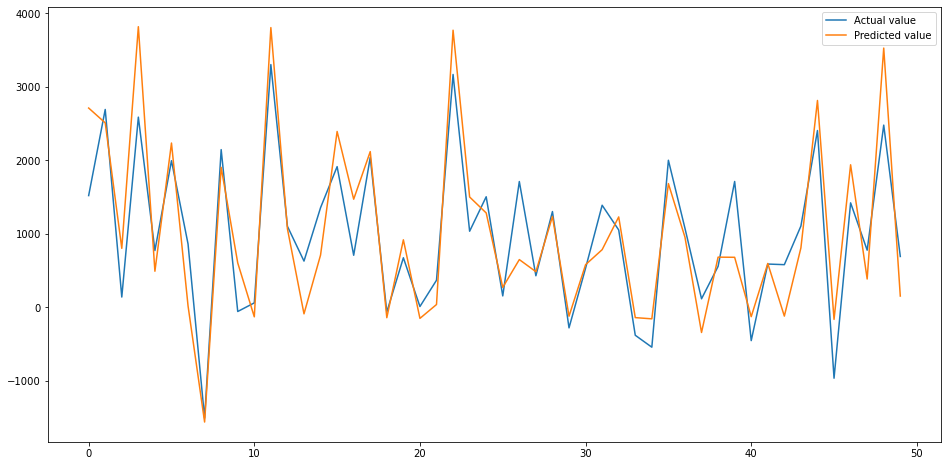

In [249]:
# plot the camparison between actual values and predicted values generated using the best model
test = pd.DataFrame({'Predicted value':y_pred_XGBR, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

## Hyperparameter tuning using RandomizedSearchCV on XGBRegressor

In [250]:
model_XGBR.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [251]:
# Fit the range of hyper tuning parameters in RandomizedSearchCV to build the best model
param_grid = dict(
    n_jobs=[16],
    learning_rate=[0.1, 0.5],
    objective=['reg:squarederror'],
    max_depth=[5, 10, 15], 
    n_estimators=[100, 500, 1000],
    subsample=[0.2, 0.8, 1.0],
    gamma=[0.05, 0.5],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[1, 0],
)

model_XGBR = XGBRegressor(random_state=1, verbosity=1)

random_search = RandomizedSearchCV(estimator=model_XGBR,
                           param_distributions=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = random_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'subsample': 0.2, 'scale_pos_weight': 0, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'reg:squarederror', 'n_jobs': 16, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5}


In [252]:
# Fit the best hyperparamter values in XGBRegressor model
regressor_XGBR = XGBRegressor(
    gamma=0.5,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=500,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=1,
    reg_alpha=0,
    reg_lambda=0
)
model_XGBR = regressor_XGBR.fit(X_train, y_train)
y_pred_XGBR = model_XGBR.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred_XGBR))

450.7597533015992

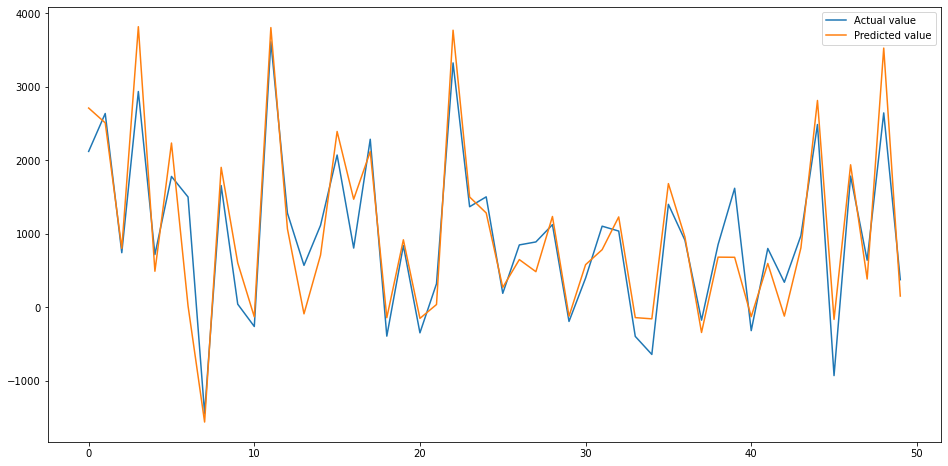

In [253]:
# plot the improvement in the prediction after the hyperparamter tunning
test = pd.DataFrame({'Predicted value':y_pred_XGBR, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

## Hyperparameter tuning using RandomizedSearchCV on RandomForestRegressor

In [254]:
# Check the prediction values before hyperparamter tunning using RandomForestRegressor 
model_RFR = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model_RFR.fit(X_train, y_train)
y_pred_rfr = model_RFR.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_rfr))

721.87871778935

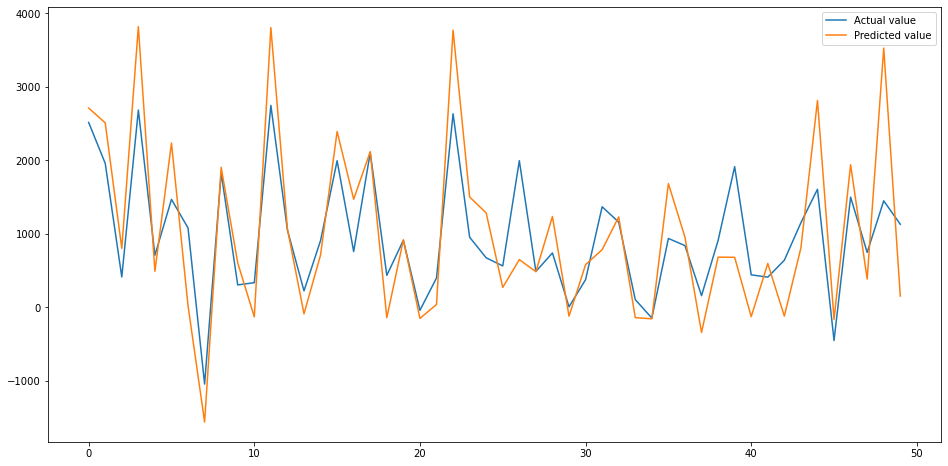

In [255]:
#plpot the actual values and predicted values before hyperparameter tunning
test = pd.DataFrame({'Predicted value':y_pred_rfr, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [256]:
# get the hyper paramter values for random Forest model
model_RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [257]:
# using Different RandomForestRegressor hyperparameters in RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

random_search = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              scoring='neg_root_mean_squared_error',
                              cv=5,
                              verbose=True)


RF_model = random_search.fit(X_train, y_train)
print('Optimum parameters', RF_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimum parameters {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': None}


In [258]:
# Most ideal hyperparamters based on RandomizedSearchCV on RandomForest and predict the RMSE
ideal_RF_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=5,
                                    min_samples_split=14,
                                    max_features=.5,
                                    max_depth = None,
                                    random_state=42) # random state so our results are reproducible



model_RFR = ideal_RF_model.fit(X_train, y_train)
y_pred_RFR = ideal_RF_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred_RFR))

703.4191572525904

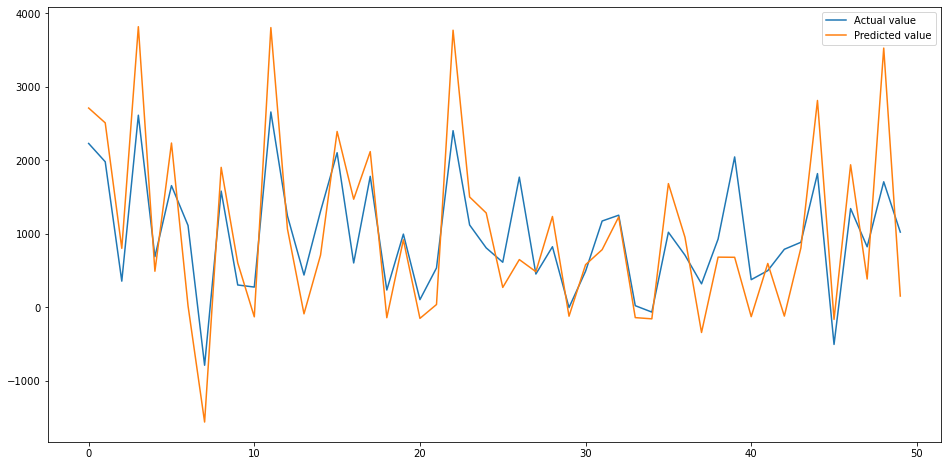

In [259]:
# Plot the actual and predicted values after hyperparamter values
test = pd.DataFrame({'Predicted value':y_pred_RFR, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [260]:
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_valid, val_preds)}
    return scores

In [261]:
# Make predictions on the test data using the best performing model of our analysis
test_preds = regressor_XGBR.predict(X_test)
pd.DataFrame(test_preds)

,0
0,2123.090820
1,2638.808594
2,745.219116
3,2937.919434
4,720.495178
...,...
295,871.797668
296,369.179840
297,1692.269897
298,437.313660


## Compare the evaluation metrix of Regression model on both models

In [262]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 394.26378452479696,
 'Test MAE': 540.1882715669724,
 'Training R^2': 0.815838637526105,
 'Test R^2': 0.6463500651200411}

In [263]:
show_scores(regressor_XGBR)

{'Training MAE': 2.485237823386492,
 'Test MAE': 75.77737474314371,
 'Training R^2': 0.9999933722381381,
 'Test R^2': 0.9662934740816626}

### Part B

In [264]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

categorical_features = ["F20", "F27"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

test_data = transformer.fit_transform(test_data)
pd.DataFrame(test_data)

predicted = regressor_XGBR.predict(test_data)
pd.DataFrame(predicted).head()

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('P2_Test_Predictions.csv').iloc[:,:-1])